# Homework 2
---

### Question 1: Basic Arithmatic
International Space Station orbits the Earth at $400$ km altitude. In an unfortunate turn of event two astronauts are stranded in it since June (Read e.g. [News](https://businessinsider.com.pl/wiadomosci/utkneli-w-kosmosie-osiem-miesiecy-temu-jest-szansa-na-powrot/b1qwl94) for details). Find out how fast they are orbitting the Earth. How much time they take to go around the Earth once? Estimate the total energy of the satellite (kinetic + gravitational) if the mass of the space station is $4.5\times 10^{5}kg$.


In [3]:
# lets import useful libraries
import math as m

In [37]:
Mass_of_Earth = 5.972e24 # kg
Gravitational_constant = 6.6743e-11 # N m^2/kg^2
altitude = 420e3 # m - height from surface of the Earth
earth_radius = 6_371e3 # m
ISS_mass = 4.5e5 #kg
gravitational_acceleration = 9.81 # m / s^2

# write the formula here and evaluate.
orbital_speed = m.sqrt(Gravitational_constant * Mass_of_Earth / (earth_radius + altitude))
time_period = 2 * m.pi * (earth_radius + altitude) / orbital_speed
kinetic_energy = ISS_mass * orbital_speed * orbital_speed / 2
gravitational_energy = ISS_mass * gravitational_acceleration * altitude
total_energy = kinetic_energy + gravitational_energy

print("Raw data:")
print(orbital_speed)
print(time_period)
print(kinetic_energy)
print(gravitational_energy)
print(total_energy)

print("\nNice to read:")
print(f"v = {1e-3*orbital_speed:.3f} km/s")
print(f"T = {time_period:.0f} s = {1/60*time_period:.3f} min")
print(f"Ek = {kinetic_energy:.0f} J = {1e-9*kinetic_energy:.2f} GJ")
print(f"Ep = {gravitational_energy:.0f} J = {1e-9*gravitational_energy:.2f} GJ")
print(f"E = {total_energy:.0f} J = {1e-9*total_energy:.2f} GJ")

Raw data:
7661.184055220412
5569.519164858255
13206091753791.783
1854090000000.0
15060181753791.783

Nice to read:
v = 7.661 km/s
T = 5570 s = 92.825 min
Ek = 13206091753792 J = 13206.09 GJ
Ep = 1854090000000 J = 1854.09 GJ
E = 15060181753792 J = 15060.18 GJ


Does your answer matches with the actual values? Check [wikipedia](https://en.wikipedia.org/wiki/International_Space_Station).

### Question 2: Semi Emperical Mass formula

In nuclear physics, there exist a simple formula to approximate the binding energy of an atomic nucleus of atomic number $Z$ and mass number $A$.
$$
B = a_1 A - a_2 A^{2/3} - a_3 {Z^2\over A^{1/3}} - a_4 {(A - 2Z)^2\over A} + {a_5\over A^{1/2}}\,,
$$
where, in units of MeV, the constants are
$a_1=15.67$, $a_2=17.23$, $a_3=0.75$, $a_4=93.2$, and
$$
a_5 = \left\lbrace\begin{array}{ll}
      0     &\quad\text{if $A$ is odd,} \\
      12.0  &\quad\text{if $A$ and $Z$ are both even,} \\
      -12.0 &\quad\text{if $A$ is even and $Z$ is odd.}
      \end{array}\right.
$$
 - Write a function which takes $A$ and $Z$ as input and returns the binding energy. What is the binding energy for sodium and chlorine?
 - Define another function which returns binding energy per nucleon. Which one has higher binding energy per nucleon $Ni^{62}$ or $C^{12}$.
 - Create a list of atoms with atomic numbers starting from 10 to 100. Assuming neutron number equal to the proton number calculate the binding energy per nucleon for each of the atoms (use loop!). What is the average binding energy per nucleon for all those atoms?


In [69]:
def binding_energy(A, Z):
    # your code goes here

    if A & 1: a5=0
    elif Z & 1: a5=-12
    else: a5=12

    return 15.67 * A \
        - 17.23 * pow(A, 2/3) \
        - 0.75 * Z*Z / pow(A, 1/3) \
        - 93.2 * (A - 2 * Z)**2 / A \
        + a5 / m.sqrt(A)

In [70]:
sodium = {"A": 11,
          "Z": 23}
chlorine = {"A": 17,
            "Z": 35}
print("binding energy sodium = ", binding_energy(sodium["A"], sodium["Z"]))
print("binding energy sodium = ", binding_energy(chlorine["A"], chlorine["Z"]))

binding energy sodium =  -10470.338376929805
binding energy sodium =  -15604.767457888516


In [72]:
def binding_energy_per_nucleon(A, Z):
    # your code goes here
    return binding_energy(A, Z) / A

In [81]:
Ni62 = {"A": 28,
        "Z": 62}
C12 = {"A": 6,
        "Z": 12}
E_Ni62 = binding_energy_per_nucleon(Ni62["A"], Ni62["Z"])
E_C12 = binding_energy_per_nucleon(C12["A"], C12["Z"])
if E_Ni62 > E_C12: W="Ni62" 
else: W="C12"
print(W, "have higher energy per nucleon by", abs(E_C12 - E_Ni62))

C12 have higher energy per nucleon by 277.70520516021327


### List

In [97]:
Atoms = []
for i in range(10,101):
    Atoms.append({"A": i,
                  "Z": i+i,
                  "binding_energy_per_nucleon":  binding_energy_per_nucleon(i, i+1)})
just_energy = [x["binding_energy_per_nucleon"] for x in Atoms]
average_energy = sum(just_energy) / len(just_energy)
print("average energy = ", average_energy)

average energy =  -103.43964776476065


# Bonus - plot

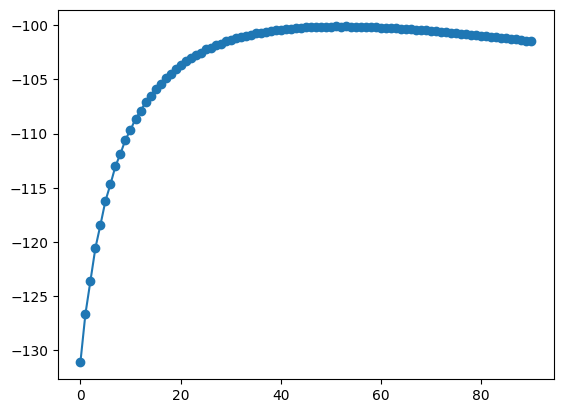

In [110]:
import matplotlib.pyplot as plt
plt.plot(just_energy,"-o")

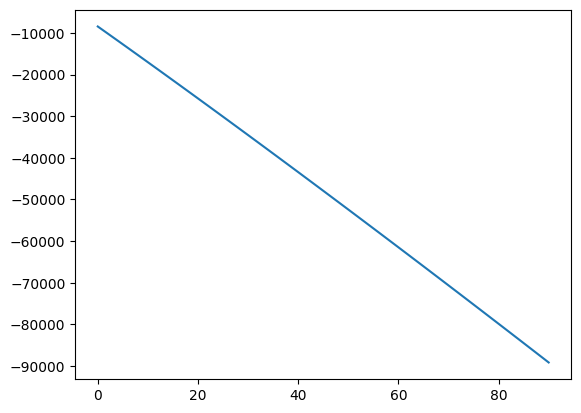

In [111]:
plt.plot([binding_energy(x["A"],  x["Z"]) for x in Atoms])